# Data prepping: cleaning & features engineering

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import string
from functions.utilities import *

In [2]:
#to be able to have multiple output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#read the data
trainpath = './data/train.csv'
testpath = './data/test.csv'
traindf = pd.read_csv(trainpath, delimiter=",")
testdf = pd.read_csv(testpath, delimiter=",")
fulldf = traindf.merge(testdf, how="outer")

dfs = [fulldf, testdf, traindf]

#show the data set
fulldf.shape #returns (#lines, #columns)
fulldf.head()

#data type dictionary
data_type_dict={'PassengerId':'numeric',
                'Survived':'nominal',
                'Pclass':'ordinal',
                'Name':'nominal',
                'Sex':'nominal', 
                'Age':'numeric', 
                'SibSp':'numeric',
                'Parch':'numeric',
                'Ticket':'nominal',
                'Fare':'numeric', 
                'Cabin': 'nominal',
                'Embarked':'nominal'}

(1309, 12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# check which columns have NA values
fulldf.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

We can see from the last table that some columns requires cleaning: Cabin, Embarked and Age.

In [5]:
#get an understanding of the possible values in relevant columns
fulldf.Pclass.unique()
fulldf.Sex.unique()
fulldf.SibSp.unique()
fulldf.Parch.unique()

array([3, 1, 2], dtype=int64)

array(['male', 'female'], dtype=object)

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

array([0, 1, 2, 5, 3, 4, 6, 9], dtype=int64)

## Data cleaning

## Getting the title from the name

In [26]:
title_dict = {
    "Mrs": "Mrs",
    "Ms": "Mrs",
    "Mme": "Mrs",
    "Miss": "Miss",
    "Mlle": "Miss",
    "Mr": "Mr",
    "Master": "Master",
    "Major": "Officer",
    "Col": "Officer",
    "Capt": "Officer",
    "Rev": "Officer",
    "Dr": "Officer",
    "Countess": "Royalty",
    "Sir": "Royalty",
    "Lady": "Royalty",
    "Don": "Royalty",
    "Jonkheer": "Royalty"
}
def getTitles(df, dict):
    df['Title']=df['Name'].map(lambda x: substrings_in_string(x, dict.keys()))
    data_type_dict['Title'] = 'nominal'
    df['Title'] = df.Title.map(dict)
    
updateAllDataSets(getTitles, dfs, title_dict)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr,Unknown
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss,Unknown
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Mr,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,Unknown,S,Mr,Unknown
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Royalty,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,Unknown,S,Mr,Unknown
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,Unknown,S,Mr,Unknown


### Embarked

In [6]:
fulldf.Embarked.unique()
fulldf[fulldf.Embarked.isna()]

array(['S', 'C', 'Q', nan], dtype=object)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Only two people don't have an embarking station. We looked if someone from the same family embarked with them but it did not help. 

In [7]:
fulldf.Cabin = fulldf.Cabin.fillna('Unknown')
fulldf.loc[(fulldf["Name"].str.contains('Icard|Stone')) | (fulldf["Cabin"].str.contains('B28'))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
319,320,1.0,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5,E34,C
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Instead, we fill the missing values with the most frequent one.

In [55]:
def nbEmbarked(df,embarked):
    return df.loc[(df['Embarked'] == embarked)].shape[0]

nb_Embarked = list(map(lambda x: nbEmbarked(fulldf, x), ['S', 'C', 'Q']))
nb_Embarked # (914, 268, 123)

[914, 270, 123]

PassengerId  Survived  Pclass  SibSp  Parch     Fare
Embarked Sex                                                         
C        female        692.0       1.0     1.0    0.0    0.0  57.7500
         male          732.0       0.0     2.0    0.0    0.0  21.6792
Q        female        656.5       1.0     3.0    0.0    0.0   7.7500
         male          719.0       0.0     3.0    0.0    0.0   7.7500
S        female        616.0       1.0     2.0    0.0    0.0  23.0000
         male          651.0       0.0     3.0    0.0    0.0  10.5000

Even tough most people embarked at 'S'. We see that it makes more sense to attribute a 'C' value to these two missing values given their fare and sex

In [57]:
groupedEmb = fulldf.groupby(['Embarked','Sex', 'Pclass'])
groupedEmb_median = groupedEmb.median()
groupedEmb_median

PassengerId  Survived  SibSp  Parch      Fare
Embarked Sex    Pclass                                               
C        female 1             701.0       1.0    0.0    0.0  83.15830
                2             867.0       1.0    1.0    0.0  27.72080
                3             645.0       1.0    0.0    1.0  14.45420
         male   1             690.5       0.0    0.0    0.0  62.66875
                2             818.0       0.0    0.0    0.0  15.04580
                3             747.5       0.0    0.0    0.0   7.22920
Q        female 1             858.0       1.0    1.0    0.0  90.00000
                2             313.5       1.0    0.0    0.0  12.35000
                3             669.5       1.0    0.0    0.0   7.75000
         male   1             246.0       0.0    2.0    0.0  90.00000
                2             908.0       0.0    0.0    0.0  12.35000
                3             704.0       0.0    0.0    0.0   7.75000
S        female 1             731.0       1.0    1.0    0.0  78.85000
                2             581.0       1.0    0.0    0.0  23.00000
                3             568.0       0.0    1.0    0.0  13.77500
         male   1             624.0       0.0    0.0    0.0  35.50000
                2             696.0       0.0    0.0    0.0  13.00000
                3             638.5       0.0    0.0    0.0   8.05000

From this tabular, we see that given the Fare and the sex of the two persons, it is more likely that they embarked at "C".

### Cabin

In [8]:
fulldf.Cabin.unique()
# fulldf[fulldf.Cabin=="Unknown"] #we changed NA values to Unknown just before

array(['Unknown', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [9]:
def peoplePerCat(df,category):
    return df.loc[(df['Pclass'] == category)].shape[0]

def unknownCabinsPerCat(df,category):
    return df.loc[(df['Cabin'] == "Unknown") & (df['Pclass'] == category)].shape[0]
 
categories = [1, 2, 3]
 
nb_unknown = fulldf.loc[(fulldf['Cabin'] == "Unknown")].shape[0] #1014
nb_unknownPerCat = list(map(lambda x: unknownCabinsPerCat(fulldf, x),categories))
nb_perCat = list(map(lambda x: peoplePerCat(fulldf, x), categories))
    
np.divide(nb_unknownPerCat,nb_perCat)

array([0.20743034, 0.91696751, 0.977433  ])

### Age

In [29]:
fulldf.Age.describe()
fulldf[fulldf.Age.isna()]

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Unknown,Q,Mr,Unknown
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,Unknown,S,Mr,Unknown
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,Unknown,C,Mrs,Unknown
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,Unknown,C,Mr,Unknown
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Unknown,Q,Miss,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,Unknown,Q,Miss,Unknown
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,Unknown,Q,Miss,Unknown
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,Unknown,S,Mr,Unknown
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,Unknown,S,Mr,Unknown


In [36]:
## Adding age for missing values (263)
grouped = fulldf.groupby(['Sex', 'Pclass', 'Title'])
grouped_median = grouped.median()
grouped_median
grouped_median = grouped_median.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

PassengerId  Survived   Age  SibSp  Parch       Fare
Sex    Pclass Title                                                        
female 1      Miss           521.0       1.0  30.0    0.0    0.0  106.42500
              Mrs            840.0       1.0  45.0    1.0    0.0   77.34375
              Officer        797.0       1.0  49.0    0.0    0.0   25.92920
              Royalty       1033.0       1.0  36.0    0.0    0.0   97.70000
       2      Miss           617.5       1.0  20.0    0.0    0.0   20.25000
              Mrs            518.0       1.0  30.0    0.5    0.0   26.00000
       3      Miss           603.5       0.5  18.0    0.0    0.0    8.05000
              Mrs            668.5       0.5  31.0    1.0    1.0   15.50000
male   1      Master         803.0       1.0   6.0    1.0    2.0  134.50000
              Mr             632.5       0.0  42.0    0.0    0.0   48.30210
              Officer        678.0       0.0  52.0    0.0    0.0   37.55000
              Royalty        427.0       0.0  39.0    0.0    0.0   13.86040
       2      Master         550.0       1.0   2.0    1.0    1.0   26.00000
              Mr             723.5       0.0  30.0    0.0    0.0   13.00000
              Officer        513.0       0.0  41.5    0.0    0.0   13.00000
       3      Master         789.0       0.0   6.0    3.0    1.0   22.35830
              Mr             640.5       0.0  26.0    0.0    0.0    7.89580

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,45.0
2,female,1,Officer,49.0
3,female,1,Royalty,36.0
4,female,2,Miss,20.0


In [43]:
def fill_age(row, grouped):
    condition = (
        (grouped['Sex'] == row['Sex']) & 
        (grouped['Title'] == row['Title']) & 
        (grouped['Pclass'] == row['Pclass'])
    )
    return grouped[condition]['Age']

def process_age(df, grouped):
    df['Age'] = df.apply(lambda row: fill_age(row, grouped) if np.isnan(row['Age']) else row['Age'], axis=1)
    
process_age(fulldf, grouped_median)   
fulldf[fulldf.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck


## Fare and category

In [11]:
fulldf.Fare.describe()
fulldf[fulldf.Fare.isna()]

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,Unknown,S


## Finding the mean and variance

In [12]:
# Description: compute the mean and std of the fram of each category
# Input: dataframe df, list of categories
# Output: list of tuples giving the mean and the variance for each cat
def statFaresCat(df, categories):
    statInfos = []
    for category in categories:
        dfCat = df.loc[df['Pclass'] == category]
        df_stats = [dfCat.loc[:,"Fare"].describe()]
        statInfos.append(df_stats)
    return statInfos 
                         
statFaresCat(fulldf, categories)

[[count    323.000000
  mean      87.508992
  std       80.447178
  min        0.000000
  25%       30.695800
  50%       60.000000
  75%      107.662500
  max      512.329200
  Name: Fare, dtype: float64],
 [count    277.000000
  mean      21.179196
  std       13.607122
  min        0.000000
  25%       13.000000
  50%       15.045800
  75%       26.000000
  max       73.500000
  Name: Fare, dtype: float64],
 [count    708.000000
  mean      13.302889
  std       11.494358
  min        0.000000
  25%        7.750000
  50%        8.050000
  75%       15.245800
  max       69.550000
  Name: Fare, dtype: float64]]

As we can see, some people have a fare of zero. Let's see how many.

In [13]:
for category in categories :
    print("# person whose fare is zero in category " + str(category) + ": " + str(len(fulldf.loc[(fulldf["Fare"]== 0) & (fulldf["Pclass"] == category)])))
    
fulldf.loc[(fulldf["Fare"]== 0) & fulldf["Cabin"].notna()]

# person whose fare is zero in category 1: 7
# person whose fare is zero in category 2: 6
# person whose fare is zero in category 3: 4


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0.0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,Unknown,S
263,264,0.0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1.0,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,Unknown,S
277,278,0.0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,Unknown,S
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,Unknown,S
413,414,0.0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,Unknown,S
466,467,0.0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,Unknown,S
481,482,0.0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,Unknown,S
597,598,0.0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,Unknown,S
633,634,0.0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,Unknown,S


### Inducing the fare from the category

In [14]:
def addFareGivenCat(df, category, categories, fulldf):
    statInfos = statFaresCat(fulldf,categories)

### Getting the Deck from the cabin number

In [16]:
#Turning cabin number into Deck
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Unknown'] 

def addColumnDeck(df, cabin_list):
    df.Cabin = df.Cabin.fillna('Unknown')
    df['Deck']=df['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))
    
updateAllDataSets(addColumnDeck, dfs, cabin_list)
#fulldf.head()

### Correlation matrix

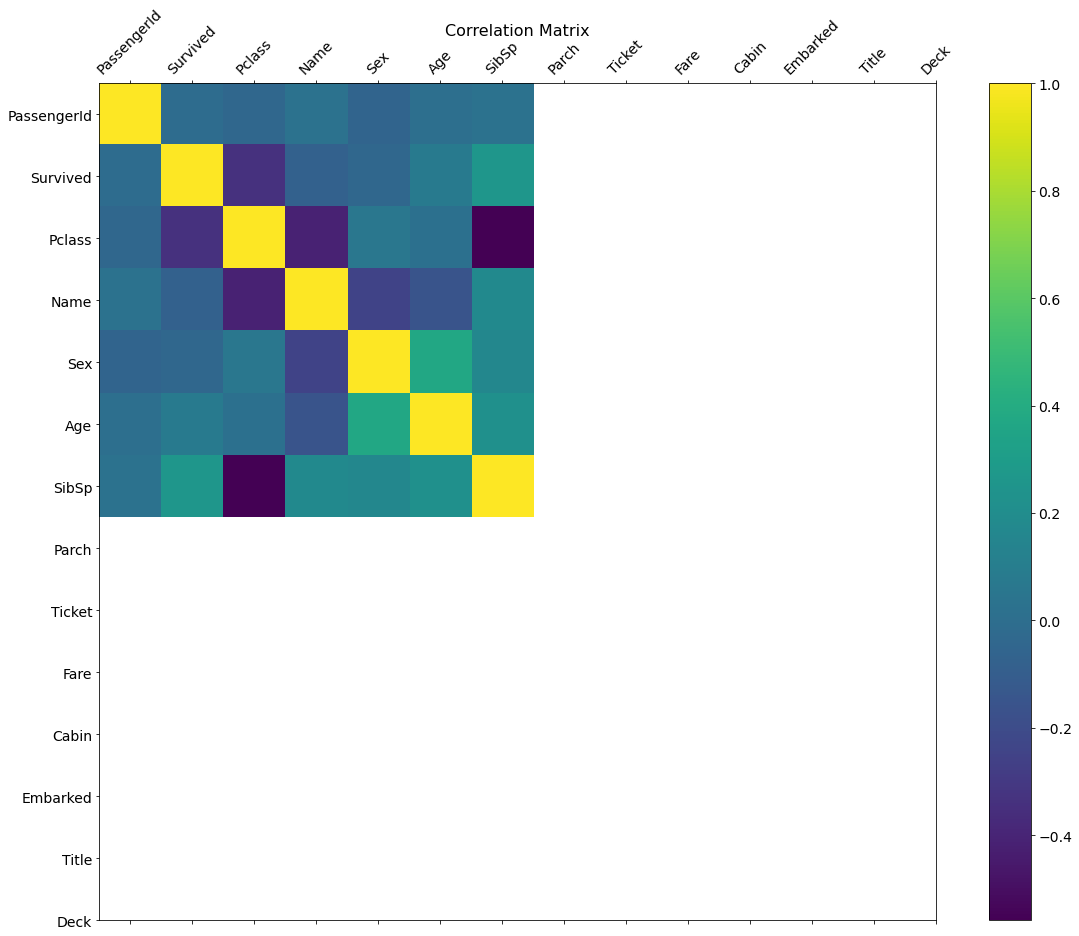

In [21]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(fulldf.corr(), fignum=f.number)
plt.xticks(range(fulldf.shape[1]), fulldf.columns, fontsize=14, rotation=45)
plt.yticks(range(fulldf.shape[1]), fulldf.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Output

In [17]:
testdf.to_csv("testdf-2.csv", index=False)
traindf.to_csv("traindf-2.csv",index=False)